## Análisis de Centros



In [19]:
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

df = sns.load_dataset("iris")
pca = PCA(n_components=2)
pca_coords = pca.fit_transform(df.drop(columns="species"))
km = KMeans(n_clusters=3, n_init=10, random_state=1)
df["labels"] = km.fit_predict(df.drop(columns="species"))

std = df.groupby("labels").std(numeric_only=True)
mean = df.groupby("labels").mean(numeric_only=True)

,sepal_length,sepal_width,petal_length,petal_width
labels,,,,
0,5.901613,2.748387,4.393548,1.433871
1,5.006000,3.428000,1.462000,0.246000
2,6.850000,3.073684,5.742105,2.071053


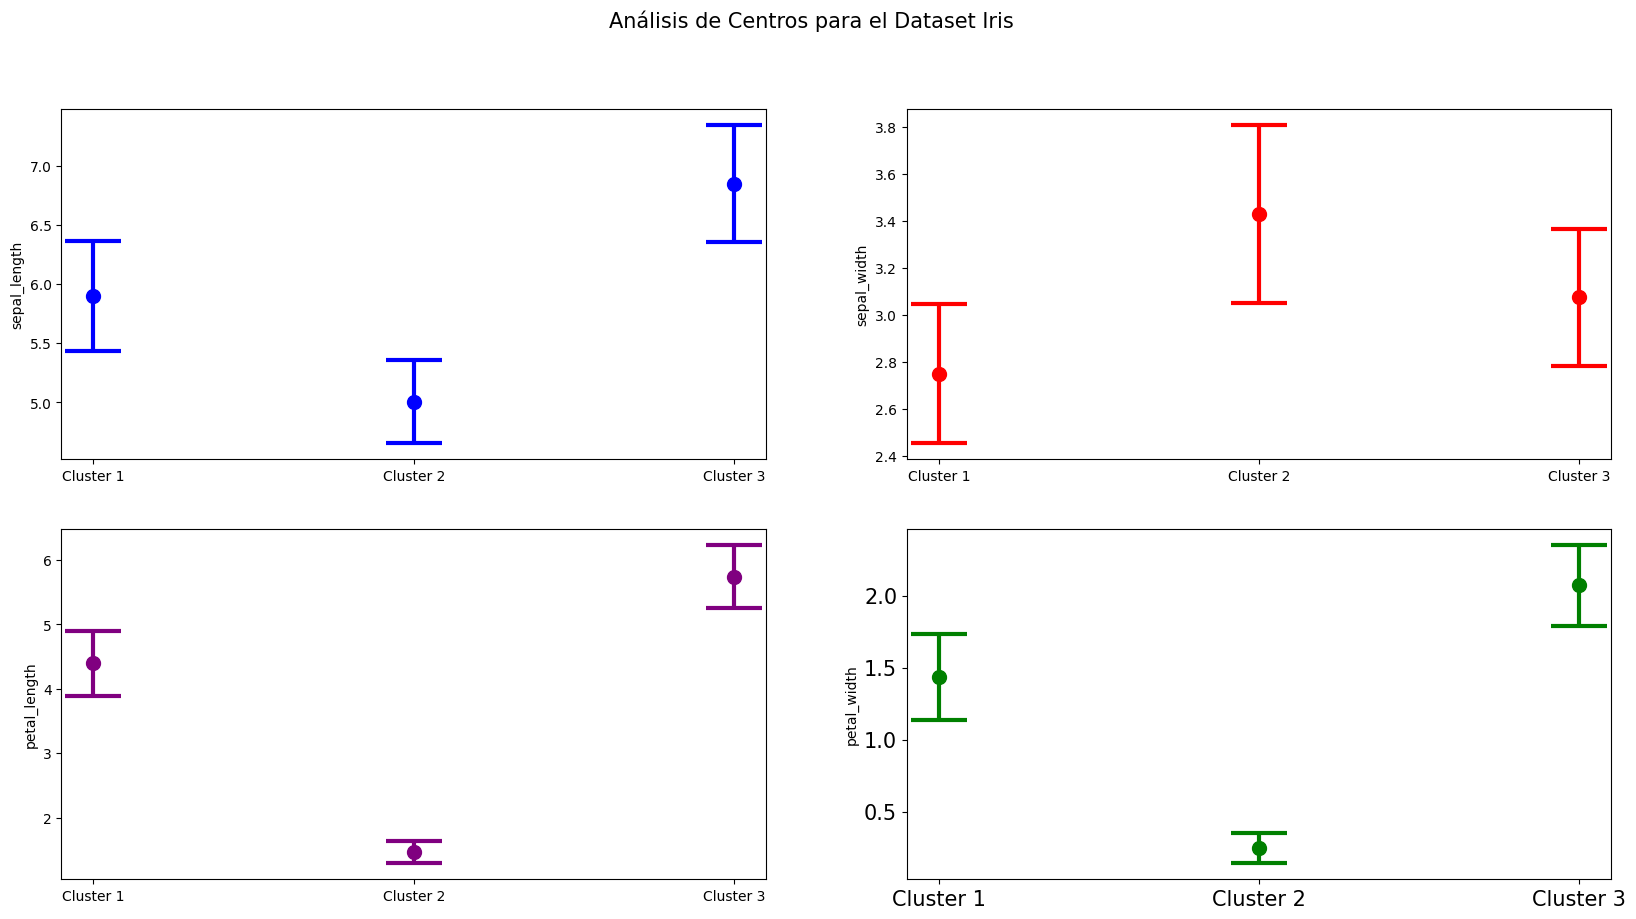

In [46]:
import matplotlib.pyplot as plt

fig, ax = plt.subplot_mosaic(
    """AB
                                CD""",
    figsize=(20, 10),
)

values = ["A", "B", "C", "D"]
columns = df.columns.tolist()
color = ["blue", "red", "purple", "green"]
for col, val, color in zip(columns, values, color):
    ax[val].errorbar(
        ["Cluster 1", "Cluster 2", "Cluster 3"],
        mean[col].tolist(),
        yerr=std[col].tolist(),
        capsize=20,
        linestyle="none",
        marker="o",
        lw=3,
        capthick=3,
        ms=10,
        c=color,
    )
    ax[val].set_ylabel(col)

plt.suptitle("Análisis de Centros para el Dataset Iris", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [2]:
df["labels"] = labels
df

,sepal_length,sepal_width,petal_length,petal_width,species,labels
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,2
146,6.3,2.5,5.0,1.9,virginica,0
147,6.5,3.0,5.2,2.0,virginica,2
148,6.2,3.4,5.4,2.3,virginica,2


In [3]:
groups = df.groupby("labels").mean(numeric_only=True)
groups

,sepal_length,sepal_width,petal_length,petal_width
labels,,,,
0,5.901613,2.748387,4.393548,1.433871
1,5.006000,3.428000,1.462000,0.246000
2,6.850000,3.073684,5.742105,2.071053


,sepal_length,petal_length,sepal_width
labels,,,
0,5.901613,4.393548,2.748387
1,5.006000,1.462000,3.428000
2,6.850000,5.742105,3.073684


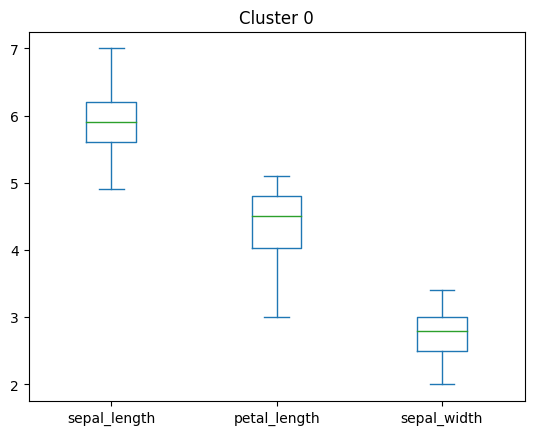

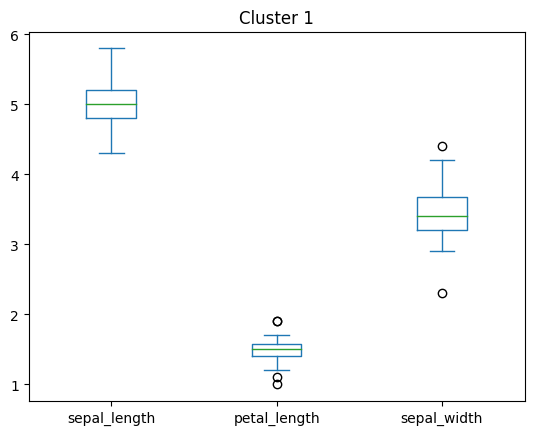

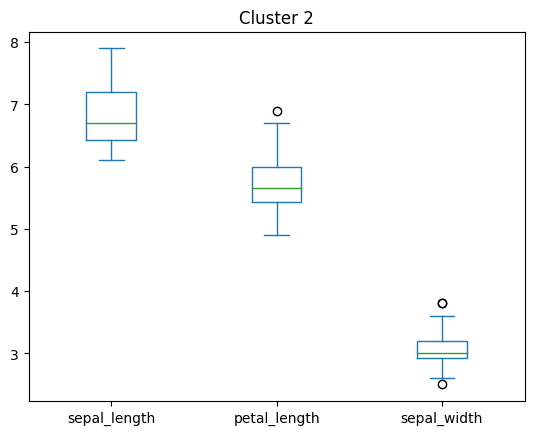

In [6]:
def center_analysis(df, columns, label_column):
    n_clusters = df[label_column].nunique()

    for l in range(n_clusters):
        df.query(f"{label_column} == @l")[columns].plot(
            kind="box", title=f"Cluster {l}"
        )

    table = df.groupby(label_column)[columns].mean(numeric_only=True)
    return table


table = center_analysis(
    df, ["sepal_length", "petal_length", "sepal_width"], "labels"
)
table

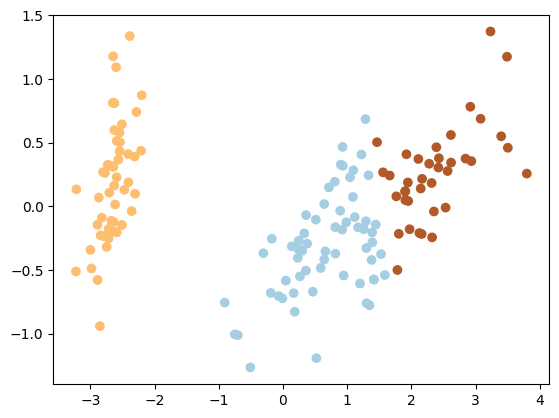

In [5]:
import matplotlib.pyplot as plt

plt.scatter(pca_coords[:, 0], pca_coords[:, 1], c=labels, cmap="Paired")

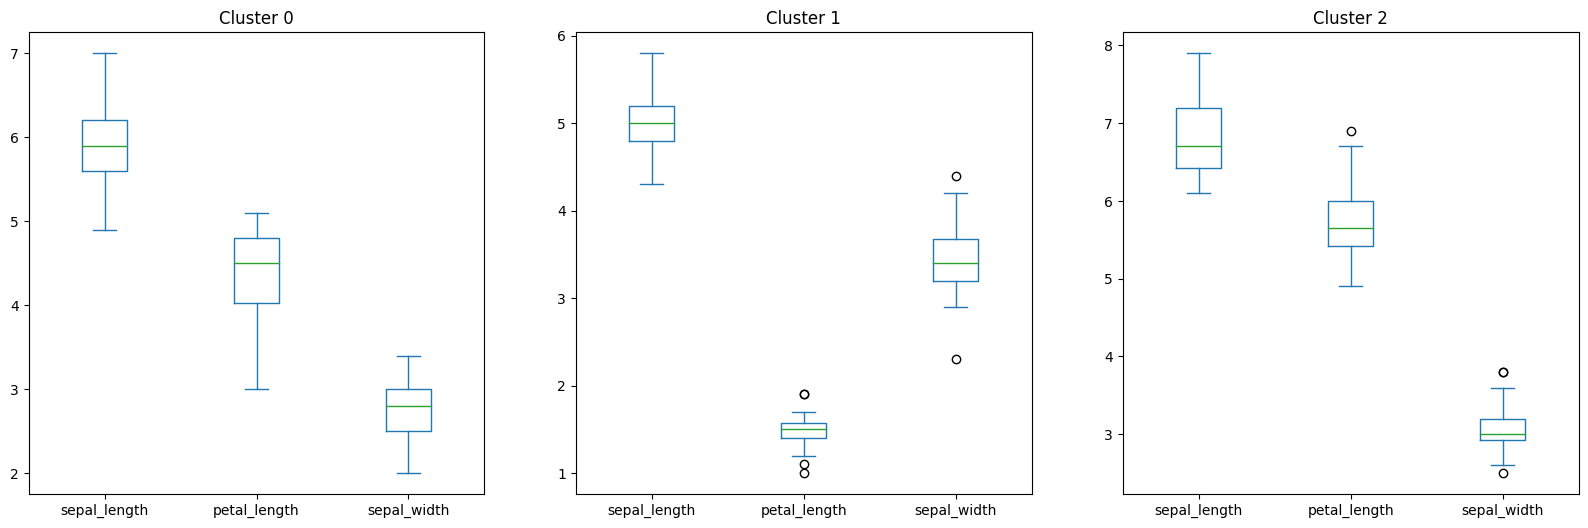

In [15]:
fig, axs = plt.subplot_mosaic("""ABC""", figsize=(20, 6))

n_clusters = df["labels"].nunique()
vals = ["A", "B", "C"]

for l, vals in zip(range(n_clusters), vals):
    df.query(f"labels == @l")[
        ["sepal_length", "petal_length", "sepal_width"]
    ].plot(kind="box", title=f"Cluster {l}", ax=axs[vals])